# TP – Clustering avec K-Means

Objectifs pédagogiques :
- Préparer un jeu de données pour l’analyse
- Construire un modèle de clustering
- Visualiser et interpréter les résultats
- Choisir le meilleur nombre de clusters (méthode du coude)


## 1. Importation des bibliothèques

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv("./data/Mall_Customers.csv")

print(dataset.head())


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## 2. Chargement du jeu de données
Assurez-vous que le fichier `Mall_Customers.csv` est dans le même dossier.

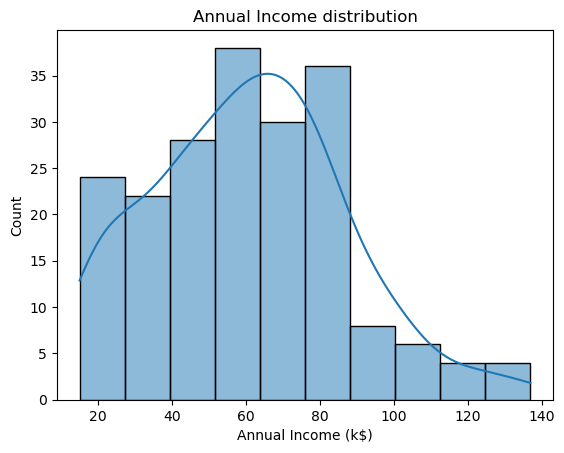

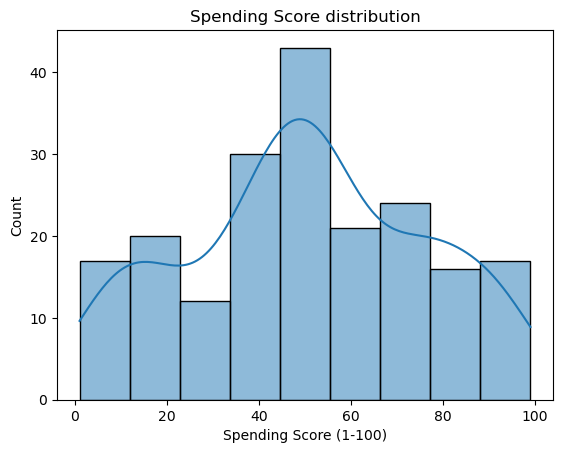

In [29]:

plt.title("Annual Income distribution")
sns.histplot(data=dataset,x="Annual Income (k$)",kde=True)
plt.show()

plt.title("Spending Score distribution")
sns.histplot(data=dataset ,x="Spending Score (1-100)",kde=True)
plt.show()




## 3. Sélection des variables
On utilise :
- Annual Income (k$)
- Spending Score (1-100)

In [30]:
X = dataset.iloc[:,[3,4]]

## 4. Application de K-Means (k = 5)

In [31]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5,init="k-means++",random_state=0)

y_kmeans = kmeans.fit_predict(X)

print(X)
print(y_kmeans)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 

## 5. Visualisation des clusters

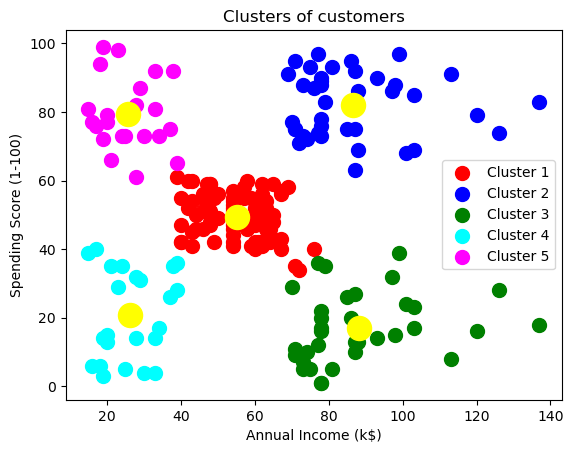

In [32]:
plt.scatter(X.iloc[y_kmeans == 0, 0], X.iloc[y_kmeans == 0, 1],
			s=100, c='red', label='Cluster 1')
plt.scatter(X.iloc[y_kmeans == 1, 0], X.iloc[y_kmeans == 1, 1],
			s=100, c='blue', label='Cluster 2')
plt.scatter(X.iloc[y_kmeans == 2, 0], X.iloc[y_kmeans == 2, 1],
			s=100, c='green', label='Cluster 3')
plt.scatter(X.iloc[y_kmeans == 3, 0], X.iloc[y_kmeans == 3, 1],
			s=100, c='cyan', label='Cluster 4')
plt.scatter(X.iloc[y_kmeans == 4, 0], X.iloc[y_kmeans == 4, 1],
			s=100, c='magenta', label='Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0],
			kmeans.cluster_centers_[:, 1], s=300, c='yellow',
			label='Centroids')
plt.show()

## 6. Choix du nombre optimal de clusters (Méthode du coude)

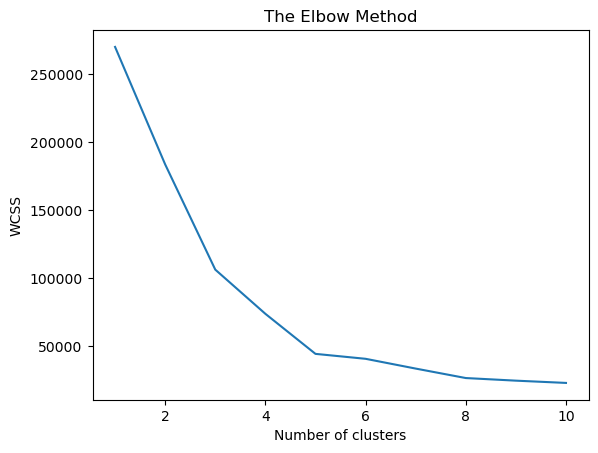

In [35]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## 7. Interprétation
- Le point où la courbe commence à ralentir indique le meilleur K
- Ici, K ≈ 5 est un bon choix
